## Transfer Learning Inception V3 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
# re-size all the images to this
IMAGE_SIZE = [256, 256]

train_path = '/home/ociadmin/Documents/Shobnom/DLFirst/Tomato-leaf-disease-classification/Dataset/train'
valid_path = '/home/ociadmin/Documents/Shobnom/DLFirst/Tomato-leaf-disease-classification/Dataset/valid'


In [4]:
# Import the InceptionV3 library as shown below
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('/home/ociadmin/Documents/Shobnom/DLFirst/Tomato-leaf-disease-classification/Dataset/train/*')

In [7]:
len(folders)

10

In [8]:
# the layers of this model
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/home/ociadmin/Documents/Shobnom/DLFirst/Tomato-leaf-disease-classification/Dataset/train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/home/ociadmin/Documents/Shobnom/DLFirst/Tomato-leaf-disease-classification/Dataset/valid',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [15]:
# fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
574/574 [==============================] - 176s 306ms/step - loss: 2.9347 - accuracy: 0.7047 - val_loss: 2.1384 - val_accuracy: 0.7991
Epoch 2/50
574/574 [==============================] - 156s 271ms/step - loss: 2.1516 - accuracy: 0.8156 - val_loss: 2.5410 - val_accuracy: 0.8144
Epoch 3/50
574/574 [==============================] - 156s 271ms/step - loss: 2.0753 - accuracy: 0.8438 - val_loss: 2.2927 - val_accuracy: 0.8495
Epoch 4/50
574/574 [==============================] - 156s 271ms/step - loss: 2.0856 - accuracy: 0.8603 - val_loss: 3.6031 - val_accuracy: 0.8037
Epoch 5/50
574/574 [==============================] - 156s 272ms/step - loss: 1.8505 - accuracy: 0.8791 - val_loss: 2.9450 - val_accuracy: 0.8482
Epoch 6/50
574/574 [==============================] - 157s 273ms/step - loss: 1.7678 - accuracy: 0.8885 - val_loss: 2.4309 - val_accuracy: 0.8694
Epoch 7/50
574/574 [============================

In [16]:
import matplotlib.pyplot as plt

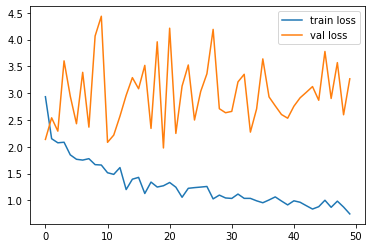

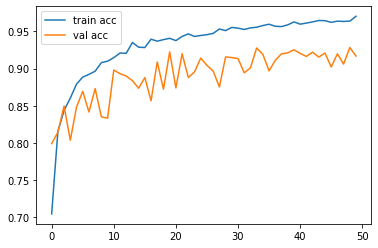

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [22]:

y_pred = model.predict(test_set)


In [23]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.5524062e-35, 1.0000000e+00, 4.0811297e-19, ..., 1.4105994e-27,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 5.0443220e-30]], dtype=float32)

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([7, 5, 1, ..., 2, 7, 5])

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_inception.h5')

In [28]:
img=image.load_img('/home/ociadmin/Documents/Shobnom/DLFirst/Tomato-leaf-disease-classification/uploads/00b814ee-cfa9-489a-bed3-c1f927bef05a___YLCV_NREC_0220.JPG',target_size=(256,256))



In [29]:
x=image.img_to_array(img)
x

array([[[ 91.,  80.,  84.],
        [ 86.,  75.,  79.],
        [ 93.,  82.,  86.],
        ...,
        [103.,  91.,  93.],
        [110.,  98., 100.],
        [102.,  90.,  92.]],

       [[ 99.,  88.,  92.],
        [ 84.,  73.,  77.],
        [ 83.,  72.,  76.],
        ...,
        [126., 114., 116.],
        [134., 122., 124.],
        [107.,  95.,  97.]],

       [[115., 104., 108.],
        [ 87.,  76.,  80.],
        [ 73.,  62.,  66.],
        ...,
        [ 89.,  77.,  79.],
        [104.,  92.,  94.],
        [ 92.,  80.,  82.]],

       ...,

       [[167., 161., 165.],
        [166., 160., 164.],
        [165., 159., 163.],
        ...,
        [169., 158., 164.],
        [160., 149., 155.],
        [156., 145., 151.]],

       [[162., 156., 160.],
        [170., 164., 168.],
        [171., 165., 169.],
        ...,
        [171., 160., 166.],
        [164., 153., 159.],
        [155., 144., 150.]],

       [[153., 147., 151.],
        [169., 163., 167.],
        [176., 1

In [30]:
x.shape

(256, 256, 3)

In [31]:
x=x/255

In [32]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 256, 256, 3)

In [33]:
model.predict(img_data)

array([[0.0000000e+00, 9.9222344e-20, 1.0000000e+00, 0.0000000e+00,
        2.5459173e-36, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.1163258e-21, 0.0000000e+00]], dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

In [35]:
a==1

array([False])